In [29]:
import pvtools as pv
import numpy as np
import matplotlib.pyplot as plt
# data_train = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-training-hb/P1.pvp')
data_benign = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb-labeled/P1.pvp')
# data_adversarial = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-adversarial-hb/P1.pvp')
# data_noisy = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-noisy-hb/P1.pvp')

# X_train = data_train['values'].toarray()
X_benign = data_benign['values'].toarray()
# X_adversarial = data_adversarial['values'].toarray()
# X_noisy = data_noisy['values'].toarray()

# inputvision_lines_tra = open('/home/jspringer/Workspace/LCAHalleBerry/output-training-hb/timestamps/InputVision.txt').readlines()
# Y_train = np.array([1 if 'Halle' in line else 0 for line in inputvision_lines_tra])

inputvision_lines_ben = open('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb/timestamps/InputVision.txt').readlines()
Y_benign = np.array([int(line.split('/')[-2])-1 for line in inputvision_lines_ben])

# inputvision_lines_adv = open('/home/jspringer/Workspace/LCAHalleBerry/output-adversarial-hb/timestamps/InputVision.txt').readlines()
# Y_adversarial = np.array([int(line.split('/')[-2])-1 for line in inputvision_lines_adv])

# inputvision_lines_noi = open('/home/jspringer/Workspace/LCAHalleBerry/output-noisy-hb/timestamps/InputVision.txt').readlines()
# Y_noisy = np.array([int(line.split('/')[-2])-1 for line in inputvision_lines_noi])

Building frame lookup for sparse pvp file
Done


In [78]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd

X_t, X_test, y_t, y_test = train_test_split(X_train[:5592], Y_train[:5592], test_size=0.01, random_state=123)

model = Perceptron(class_weight='balanced', max_iter=1000, tol=None)
model.fit(X_t, y_t)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        53
          1       0.50      0.33      0.40         3

avg / total       0.94      0.95      0.94        56



In [79]:
Y_pred_benign = model.predict(X_benign)
Y_pred_adversarial = model.predict(X_adversarial)
Y_pred_noisy = model.predict(X_noisy)
print('benign')
print(classification_report(Y_benign, Y_pred_benign))
print('adversarial')
print(classification_report(Y_adversarial, Y_pred_adversarial))
print('noisy')
print(classification_report(Y_noisy, Y_pred_noisy))

benign
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.69      0.82        75

avg / total       1.00      0.69      0.82        75

adversarial
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.67      0.80        75

avg / total       1.00      0.67      0.80        75

noisy
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.68      0.81        75

avg / total       1.00      0.68      0.81        75



/home/jspringer/Workspace/ml/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [30]:
np.round(X_benign[:, 326] * 100) / 100

array([0.1 , 0.16, 0.11, 0.09, 0.07, 0.1 , 0.1 , 0.15, 0.11, 0.1 , 0.14,
       0.13, 0.16, 0.16, 0.18, 0.22, 0.16, 0.23, 0.18, 0.15, 0.22, 0.21,
       0.11, 0.2 , 0.2 , 0.1 , 0.17, 0.33, 0.2 , 0.13, 0.29, 0.2 , 0.16,
       0.17, 0.11, 0.24, 0.19, 0.21, 0.13, 0.15, 0.17, 0.19, 0.26, 0.17,
       0.21, 0.29, 0.23, 0.15, 0.18, 0.24, 0.14, 0.12, 0.2 , 0.17, 0.18,
       0.14, 0.25, 0.26, 0.25, 0.22, 0.19, 0.09, 0.07, 0.3 , 0.2 , 0.23,
       0.31, 0.09, 0.37, 0.19, 0.31, 0.13, 0.25, 0.14, 0.43],
      dtype=float32)

In [23]:
sum(np.sign(X_benign[:, 326])) / len(X_benign)

0.72

Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done


Text(0,0.5,'Activation')

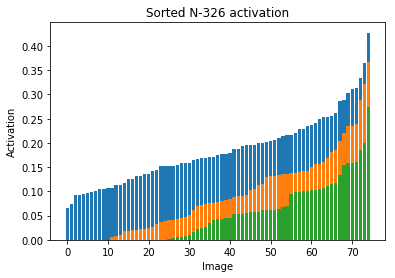

In [67]:
data_unlabeled_long = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb-unlabeled/P1.pvp')
data_labeled = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb-labeled/P1.pvp')
data_unlabeled = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb-unlabeled-2/P1.pvp')
data_vision = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-hb-vision/P1.pvp')

X_labeled = data_labeled['values'].toarray()
X_unlabeled_long = data_unlabeled_long['values'].toarray()
X_unlabeled = data_unlabeled['values'].toarray()
X_vision = data_vision['values'].toarray()

data_unlabeled_nhb = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/output-benign-nhb-unlabeled/P1.pvp')
X_unlabeled_nhb = data_unlabeled['values'].toarray()

plt.bar(np.arange(len(X_labeled)), sorted(X_labeled[:, 326]))
plt.bar(np.arange(len(X_vision)), sorted(X_vision[:, 326]))
# plt.bar(np.arange(len(X_unlabeled_long)), sorted(X_unlabeled_long[:, 326]))
# plt.bar(np.arange(len(X_unlabeled)), sorted(X_unlabeled[:, 326]))
plt.bar(np.arange(len(X_unlabeled_nhb)), sorted(X_unlabeled_nhb[:, 326]))

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

Building frame lookup for sparse pvp file
Done


<BarContainer object of 75 artists>

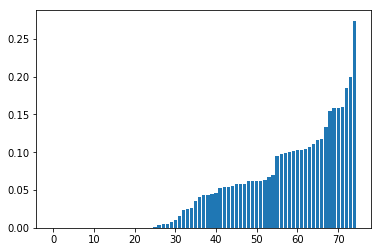